# Examples of how to use asymmetric_uncertainties package

python module available on [Github](https://github.com/muryelgp/asymmetric_uncertainties/).

### Basic Functions

In [1]:
from asymmetric_uncertainties import aufloat

A measurment with some uncertanty, for exaple:

$a = 10^{+0.5}_{-1.0}$ 

and

$b = 20^{+3.0}_{-2.0}$ 

with errors at a 68% confidence level are instanciated as 'aufloat' objects:

In [2]:
a = aufloat(10, 1.0, 0.5, confidence = 68)
b = aufloat(20, 2.0 ,3.0, confidence = 68)

The confidence levels of the errors can be pass through 'confidence' parameter, with 3 pre-defined options:

                           Confidence    Δχ2 
                              68%       1.0
                              90%       2.7
                              95%       4.0
                              
for example at 90% confidence (Δχ2 = 2.7)                              

In [3]:
c = aufloat(10, 1.1, 0.7, confidence = 90)

Or another Δχ2 value can be pass through 'delta_chi2' parameter:

In [4]:
d = aufloat(10, 2.0, 0.7, delta_chi2 = 4.7)

You can print the objects with:

In [5]:
print(a)

1.00e+01 (-1.00e+00/+5.00e-01)
68% confidence level (Δχ2=1.00)


### Plotting



Each 'aufloat' has a Probability Distribution Function (PDF), you can plot it by doing:

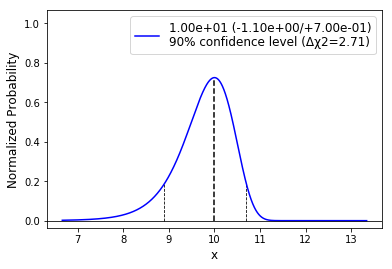

In [6]:
c.plot_pdf()


It also has a Δχ2 curve:

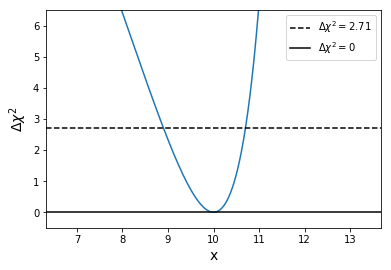

In [7]:
c.plot_delta_chi2_curve()


### Propagation of uncertanties


For simple operations (sum, subtraction, division, product and power) are straigthfoward by using standart python operations between 'aufloat' objects:

In [8]:
e = c + d #or using other operations like -, *, / and **
print(e)

1.97e+01 (-1.78e+00/+1.10e+00)
90% confidence level (Δχ2=2.71)


Other functions/operations are deal as follows:

assume you have 

$a = 10^{+1.5}_{-3.0}$ 
and
$b = 20^{+1.5}_{-5.5}$ 

and you want to calculate and propagate the uncertanties of 

$c = log(a~.b) = log(10^{+1.5}_{-3.0}~. 20^{+1.5}_{-5.5})$


In [10]:
a = aufloat(10, 3.0, 1.5, confidence = 90) #creating a and b objects
b = aufloat(20, 5.5 ,1.5, confidence = 90) 


a_data = a.gen_data() #sampling for the Monte Carlo simulation
b_data = b.gen_data()
import numpy as np
c_data = np.log(a_data*b_data)
#Create a new 'aufloat' passing the parameter data (array-like) instead of the nominal values and errors
c = aufloat(data =c_data, confidence = 90) 


#or in one step:
c = aufloat(data =np.log(a.gen_data()*b.gen_data()), confidence = 90) 

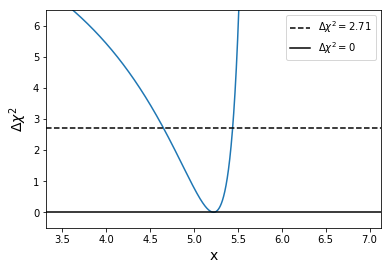

5.22e+00 (-5.71e-01/+2.17e-01)
90% confidence level (Δχ2=2.71)


In [11]:
c.plot_delta_chi2_curve()
print(c)

i.e. $c = 5.22^{+0.23}_{-0.58}$

### Rescaling uncertanties


The uncertanties can be rescaled, for example from 90% to 68% confidence level, using:

In [12]:
c.rescale_uncertainties(confidence = 68)

5.22e+00 (-2.63e-01/+1.50e-01)
68% confidence level (Δχ2=1.00)


[0.2625597099733783, 0.14991032945674743]

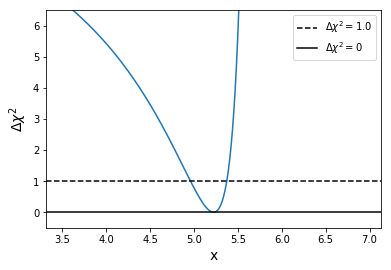

In [13]:
c.plot_delta_chi2_curve()